In [40]:
import networkx as nx
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

In [66]:
file="../citations/Citations1st10000.dat"
file2="../citations/Citations_Copy_BATriRand.dat"
G = nx.Graph()
with open(file2,'r') as f:
    while True:
        line = f.readline().strip()
        if not line:
            break
        parts = line.split()
        src = parts[0]; dst = parts[1]
        if src == dst:
            continue
        G.add_edge(src,dst)

In [45]:
clusters = [nx.clustering(G,i) for i in G.nodes()]
degrees = [G.degree(i) for i in G.nodes()]
maxdeg = max(degrees)

In [67]:
rc = nx.rich_club_coefficient(G,normalized=False)

In [69]:
rc_cumulative = [sum([rc[deg] for deg in range(0,j)]) for j in range(len(rc.keys()))]

In [71]:
possdegrees = range(len(rc.keys()))

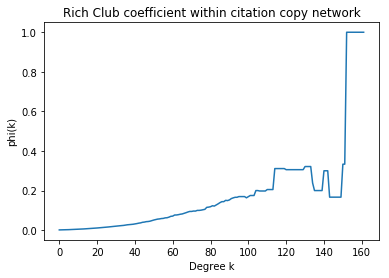

In [72]:
plt.plot(rc.keys(),rc.values())
plt.title("Rich Club coefficient within citation copy network")
plt.xlabel("Degree k")
plt.ylabel("phi(k)")
plt.show()

In [61]:
x = np.asarray(degrees)
y = np.asarray(clusters)
xy = np.vstack([degrees,clusters])
z = gaussian_kde(xy)(xy)
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]

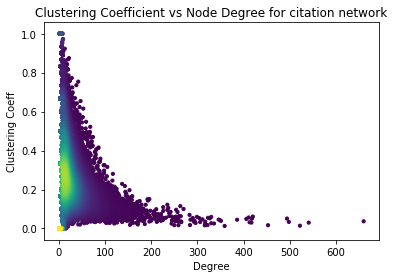

In [63]:
marker_size=1
plt.scatter(x,y, c=z, s=10)
plt.title("Clustering Coefficient vs Node Degree for citation network")
plt.xlabel("Degree")
plt.ylabel("Clustering Coeff")
plt.show()